#### 마늘 수확량 예측 프로젝트 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", family = "Malgun Gothic")

In [93]:
pd.options.display.max_rows = 500

In [94]:
df = pd.read_csv("마늘시군별생산정보.csv", encoding = "cp949")
df.head(10)

,연도,시군,코드,재배면적(ha),생산량(M/T),작황(kg/10a)
0,2013.0,강원도_강릉시,51150.0,24,187,779.2
1,2014.0,강원도_강릉시,51150.0,23.7,221.7,935.4
2,2015.0,강원도_강릉시,51150.0,23.7,191.3,807
3,2016.0,강원도_강릉시,51150.0,23.1,214.3,927.6
4,2017.0,강원도_강릉시,51150.0,21.2,181.1,854.3
5,2018.0,강원도_강릉시,51150.0,18.5,157.6,851.8
6,2019.0,강원도_강릉시,51150.0,14.8,138.4,935
7,2020.0,강원도_강릉시,51150.0,14.3,116.5,815
8,2021.0,강원도_강릉시,51150.0,14.3,118.5,829
9,2013.0,강원도_동해시,51170.0,18.1,136.1,751.9


In [95]:
# 고유의 시군 추출
region_col = df["시군"].unique().tolist()
print(len(region_col))
region_col[:5]

82


['강원도_강릉시', '강원도_동해시', '강원도_삼척시', '강원도_양구군', '강원도_양양군']

In [96]:
df.shape

(805, 6)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연도          804 non-null    float64
 1   시군          804 non-null    object 
 2   코드          804 non-null    float64
 3   재배면적(ha)    804 non-null    object 
 4   생산량(M/T)    804 non-null    object 
 5   작황(kg/10a)  804 non-null    object 
dtypes: float64(2), object(4)
memory usage: 37.9+ KB


In [98]:
# 결측치 확인
df.isna().sum()

연도            1
시군            1
코드            1
재배면적(ha)      1
생산량(M/T)      1
작황(kg/10a)    1
dtype: int64

연도 float --> int 형으로 재배면적, 생산량, 작황의 데이터타입이 object 이므로 수치형으로 변환하겠습니다.

In [99]:
# 결측치 제거
df = df.dropna()

In [100]:
# 데이터프레임에 -가 들어가는 데이터 추출하겠습니다 

df[df["재배면적(ha)"] == "-"]

,연도,시군,코드,재배면적(ha),생산량(M/T),작황(kg/10a)
66,2021.0,강원도_홍천군,51720.0,-,-,-
296,2013.0,경상북도_성주군,47840.0,-,-,-
297,2014.0,경상북도_성주군,47840.0,-,-,-
571,2019.0,전라북도_군산시,45130.0,-,-,-
665,2014.0,충청남도_공주시,44150.0,-,-,-
778,2014.0,충청북도_제천시,43150.0,-,-,-
779,2015.0,충청북도_제천시,43150.0,-,-,-


In [101]:
df.replace("-",0, inplace = True)

In [102]:
df["작황(kg/10a)"] = df["작황(kg/10a)"].astype("float")
df["재배면적(ha)"] = df["재배면적(ha)"].astype("float")
df["생산량(M/T)"] = df["생산량(M/T)"].astype("float")

In [103]:
# 0 으로 대체된 값들을 각 컬럼의 평균값으로 대체하였습니다.

df["재배면적(ha)"] = df["재배면적(ha)"].replace(0, df["재배면적(ha)"].mean())
df["작황(kg/10a)"] = df["작황(kg/10a)"].replace(0, df["작황(kg/10a)"].mean())
df["생산량(M/T)"] = df["생산량(M/T)"].replace(0, df["생산량(M/T)"].mean())

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연도          804 non-null    float64
 1   시군          804 non-null    object 
 2   코드          804 non-null    float64
 3   재배면적(ha)    804 non-null    float64
 4   생산량(M/T)    804 non-null    float64
 5   작황(kg/10a)  804 non-null    float64
dtypes: float64(5), object(1)
memory usage: 44.0+ KB


데이터 프레임의 단위를 맞추겠습니다 1아르는 100ha 이므로 재배면적을 그에맞게 변환해주고, 생산량과 작황의 단위를 kg 으로 통일 시켜주겠습니다.

In [105]:
df["재배면적(ha)"] = df["재배면적(ha)"] * (0.1) # ha --> 10a 의 단위로
df["생산량(M/T)"] = df["생산량(M/T)"] * (1000) #M/T --> kg 단위로

df.rename(columns={"재배면적(ha)":"재배면적(10a)", "생산량(M/T)":"생산량(kg)"}, inplace = True)

<Axes: >

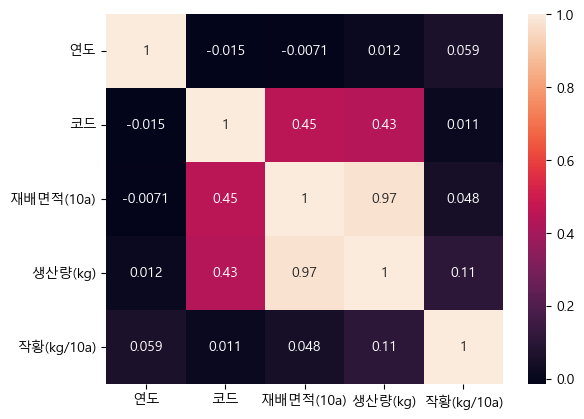

In [106]:
df_corr = df.drop("시군", axis = 1).corr()
sns.heatmap(df_corr, annot = True)

<Axes: xlabel='재배면적(10a)', ylabel='생산량(kg)'>

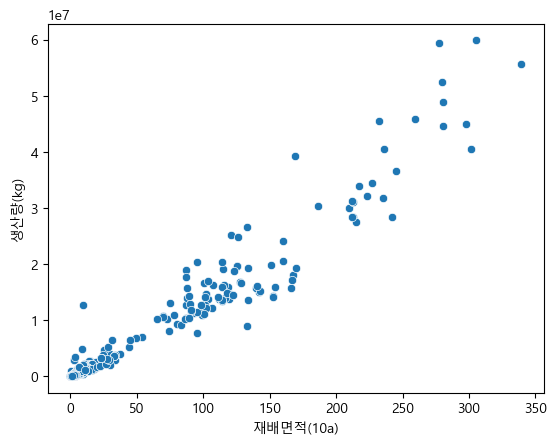

In [107]:
sns.scatterplot(x = df["재배면적(10a)"], y = df["생산량(kg)"])

<Axes: xlabel='생산량(kg)', ylabel='작황(kg/10a)'>

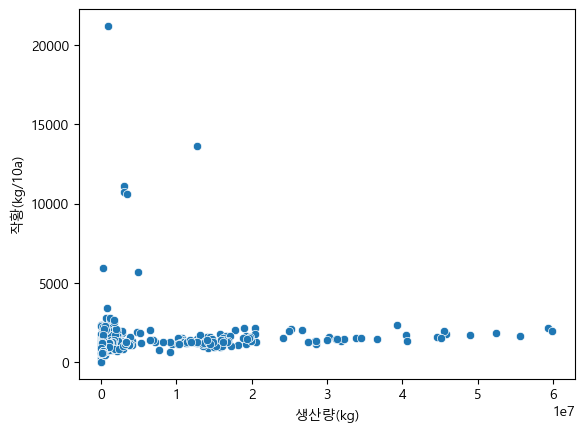

In [108]:
# 생산량 - 작황에 대한 관계 그래프
sns.scatterplot(x = df["생산량(kg)"], y = df["작황(kg/10a)"])

In [109]:
# 생산량 - 작황 그래프에서 생산량이 높다고 작황 비율이 높게 나오진 않습니다. 오히려 생산량은 적은데 작황이 많은 이상값들이 보입니다.
df[df["작황(kg/10a)"] >= 10000]

,연도,시군,코드,재배면적(10a),생산량(kg),작황(kg/10a)
246,2015.0,경상북도_구미시,47190.0,2.70,2999000.0,11107.0
247,2016.0,경상북도_구미시,47190.0,2.80,3002000.0,10721.0
248,2017.0,경상북도_구미시,47190.0,3.20,3400000.0,10625.0
368,2019.0,경상북도_예천군,47900.0,0.43,910800.0,21181.4
720,2019.0,충청남도_예산군,44810.0,9.37,12782000.0,13641.4


In [110]:
df.head()

,연도,시군,코드,재배면적(10a),생산량(kg),작황(kg/10a)
0,2013.0,강원도_강릉시,51150.0,2.40,187000.0,779.2
1,2014.0,강원도_강릉시,51150.0,2.37,221700.0,935.4
2,2015.0,강원도_강릉시,51150.0,2.37,191300.0,807.0
3,2016.0,강원도_강릉시,51150.0,2.31,214300.0,927.6
4,2017.0,강원도_강릉시,51150.0,2.12,181100.0,854.3


<Axes: xlabel='작황(kg/10a)', ylabel='Density'>

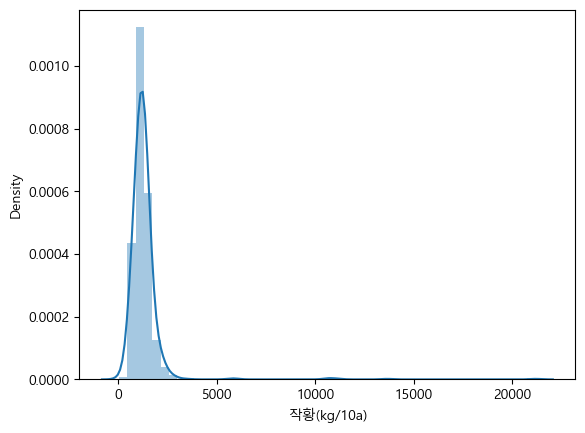

In [111]:
# 작황의 데이터 분포도 확인
#### 작황의 데이터 분포도가 왼쪽으로 skew 된것을 확인할수 있습니다. 추후 log 변한을 통해 정규분포에 가깝게 변환할 예정입니다.
sns.distplot(df["작황(kg/10a)"])

<Axes: xlabel='작황(kg/10a)', ylabel='Density'>

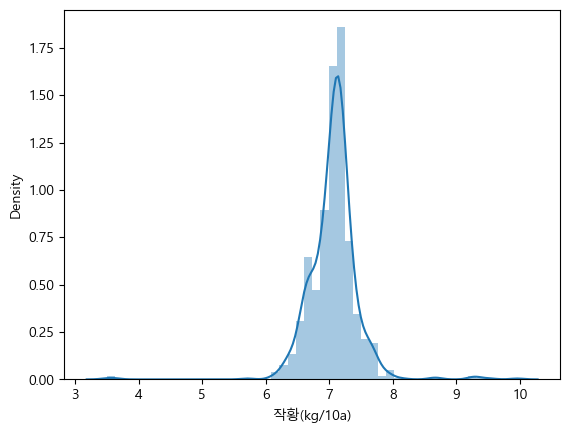

In [112]:
# log 변환으로 정규분포에 가깝게 만든 모습입니다. * 아직 변환은 하지않았습니다.
sns.distplot(np.log1p(df["작황(kg/10a)"]))

In [113]:
#### 작황의 데이터 분포도가 왼쪽으로 skew 된것을 확인할수 있습니다. 추후 log 변한을 통해 정규분포에 가깝게 변환할 예정입니다.

<Axes: xlabel='연도', ylabel='작황(kg/10a)'>

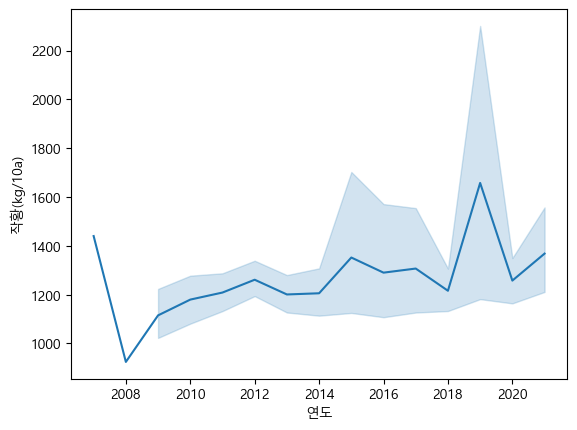

In [114]:
sns.lineplot(data = df, x = "연도", y = "작황(kg/10a)")

### 그래프로 보았을때 2019 년 마늘 재배가 가장 호황기 인것으로 나타나고 이후 2020년에 작황량이 급감한것으로 나타납니다.

### groupby 를 활용해서 데이터를 더 깊게 분석해보겠습니다.

In [115]:
### group by 를 이용한 data 확인

init_df = df.groupby("시군") # 시군별 집계함수를 살펴보겠습니다.

groupby_df = pd.DataFrame()
groupby_df["cnt"] = init_df["시군"].count()
groupby_df["mean"] = init_df["작황(kg/10a)"].mean()
groupby_df["min"] = init_df["작황(kg/10a)"].min()
groupby_df["max"] = init_df["작황(kg/10a)"].max()

groupby_df.sort_values("mean", ascending = False)

,cnt,mean,min,max
시군,,,,
경상북도_구미시,9,4878.888889,920.000000,11107.000000
경상북도_예천군,11,3125.781818,1090.300000,21181.400000
충청남도_예산군,10,2444.700000,762.000000,13641.400000
경상북도_영천시,11,1847.518182,1512.000000,2324.700000
경상남도_합천군,7,1778.142857,1441.900000,2176.000000
충청남도_금산군,9,1769.900000,794.000000,2300.000000
경상남도_창녕군,11,1761.000000,1493.000000,2139.300000
경기도_양평군,10,1684.380000,755.000000,2300.700000
전라북도_남원시,12,1574.366667,1115.800000,5709.000000


<Axes: xlabel='시군'>

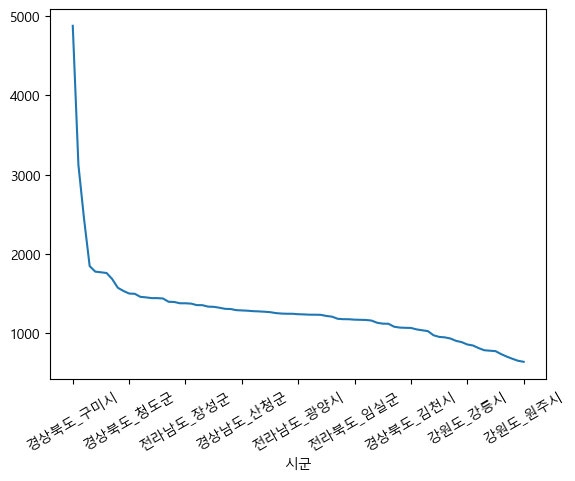

In [116]:
# 지역별 작황 추이
groupby_df.sort_values("mean", ascending = False)["mean"].plot(rot = 30)

### 경북_구미가 가장많은 작황량을, 강원도 원주시가 가장적은 작황량을 보였습니다.

In [117]:
# 수집된 각 지역별 개수
groupby_df.sort_values("cnt", ascending = False)["cnt"].to_frame().head()

,cnt
시군,
경상남도_거창군,15
전라북도_익산시,13
경상남도_거제시,13
전라북도_장수군,13
전라북도_무주군,13


<Axes: xlabel='시군'>

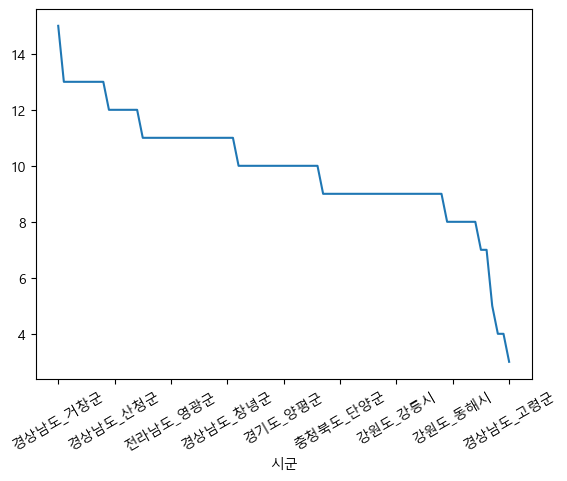

In [118]:
groupby_df.sort_values("cnt", ascending = False)["cnt"].plot(rot = 30)

### 더 나아가 연도별, 지역별 작황량 추이를 살펴보겠습니다.

In [119]:
### group by 를 이용한 data 확인

init_df_2 = df.groupby(["연도","시군"]) # 시군별 집계함수를 살펴보겠습니다.

groupby_df_2 = pd.DataFrame()
groupby_df_2["year_region_mean"] = init_df_2["작황(kg/10a)"].mean()
groupby_df_2.sort_values(by = "year_region_mean", ascending = False)

year_region_mean
연도     시군                        
2019.0 경상북도_예천군           21181.4
       충청남도_예산군           13641.4
2015.0 경상북도_구미시           11107.0
2016.0 경상북도_구미시           10721.0
2017.0 경상북도_구미시           10625.0
...                           ...
2016.0 충청남도_공주시             464.1
2015.0 충청남도_공주시             463.1
       강원도_양구군              300.0
2020.0 경상남도_거창군              36.5
2019.0 경상남도_거창군              32.1

[804 rows x 1 columns]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연도          804 non-null    float64
 1   시군          804 non-null    object 
 2   코드          804 non-null    float64
 3   재배면적(10a)   804 non-null    float64
 4   생산량(kg)     804 non-null    float64
 5   작황(kg/10a)  804 non-null    float64
dtypes: float64(5), object(1)
memory usage: 44.0+ KB


지역명: 강원도_강릉시 , row 갯수: 9
지역명: 강원도_동해시 , row 갯수: 8
지역명: 강원도_삼척시 , row 갯수: 8
지역명: 강원도_양구군 , row 갯수: 8
지역명: 강원도_양양군 , row 갯수: 8
지역명: 강원도_영월군 , row 갯수: 8
지역명: 강원도_원주시 , row 갯수: 9
지역명: 강원도_홍천군 , row 갯수: 9
지역명: 경기도_안성시 , row 갯수: 9
지역명: 경기도_양주시 , row 갯수: 9
지역명: 경기도_양평군 , row 갯수: 10
지역명: 경기도_평택시 , row 갯수: 5
지역명: 경상남도_거제시 , row 갯수: 13
지역명: 경상남도_거창군 , row 갯수: 15
지역명: 경상남도_고성군 , row 갯수: 10
지역명: 경상남도_남해군 , row 갯수: 13
지역명: 경상남도_밀양시 , row 갯수: 10
지역명: 경상남도_산청군 , row 갯수: 12
지역명: 경상남도_의령군 , row 갯수: 13
지역명: 경상남도_진주시 , row 갯수: 13
지역명: 경상남도_창녕군 , row 갯수: 11
지역명: 경상남도_하동군 , row 갯수: 12
지역명: 경상남도_함양군 , row 갯수: 11
지역명: 경상남도_합천군 , row 갯수: 7
지역명: 경상남도_고령군 , row 갯수: 3
지역명: 경상북도_구미시 , row 갯수: 9
지역명: 경상북도_군위군 , row 갯수: 10
지역명: 경상북도_김천시 , row 갯수: 11
지역명: 경상북도_문경시 , row 갯수: 11
지역명: 경상북도_상주시 , row 갯수: 10
지역명: 경상북도_성주군 , row 갯수: 11
지역명: 경상북도_안동시 , row 갯수: 11
지역명: 경상북도_영덕군 , row 갯수: 11
지역명: 경상북도_영양군 , row 갯수: 10
지역명: 경상북도_영주시 , row 갯수: 11
지역명: 경상북도_영천시 , row 갯수: 11
지역명: 경상북도_예천군 , row 갯수: 11
지역명: 경상북도_울진군 , row 갯수: 11


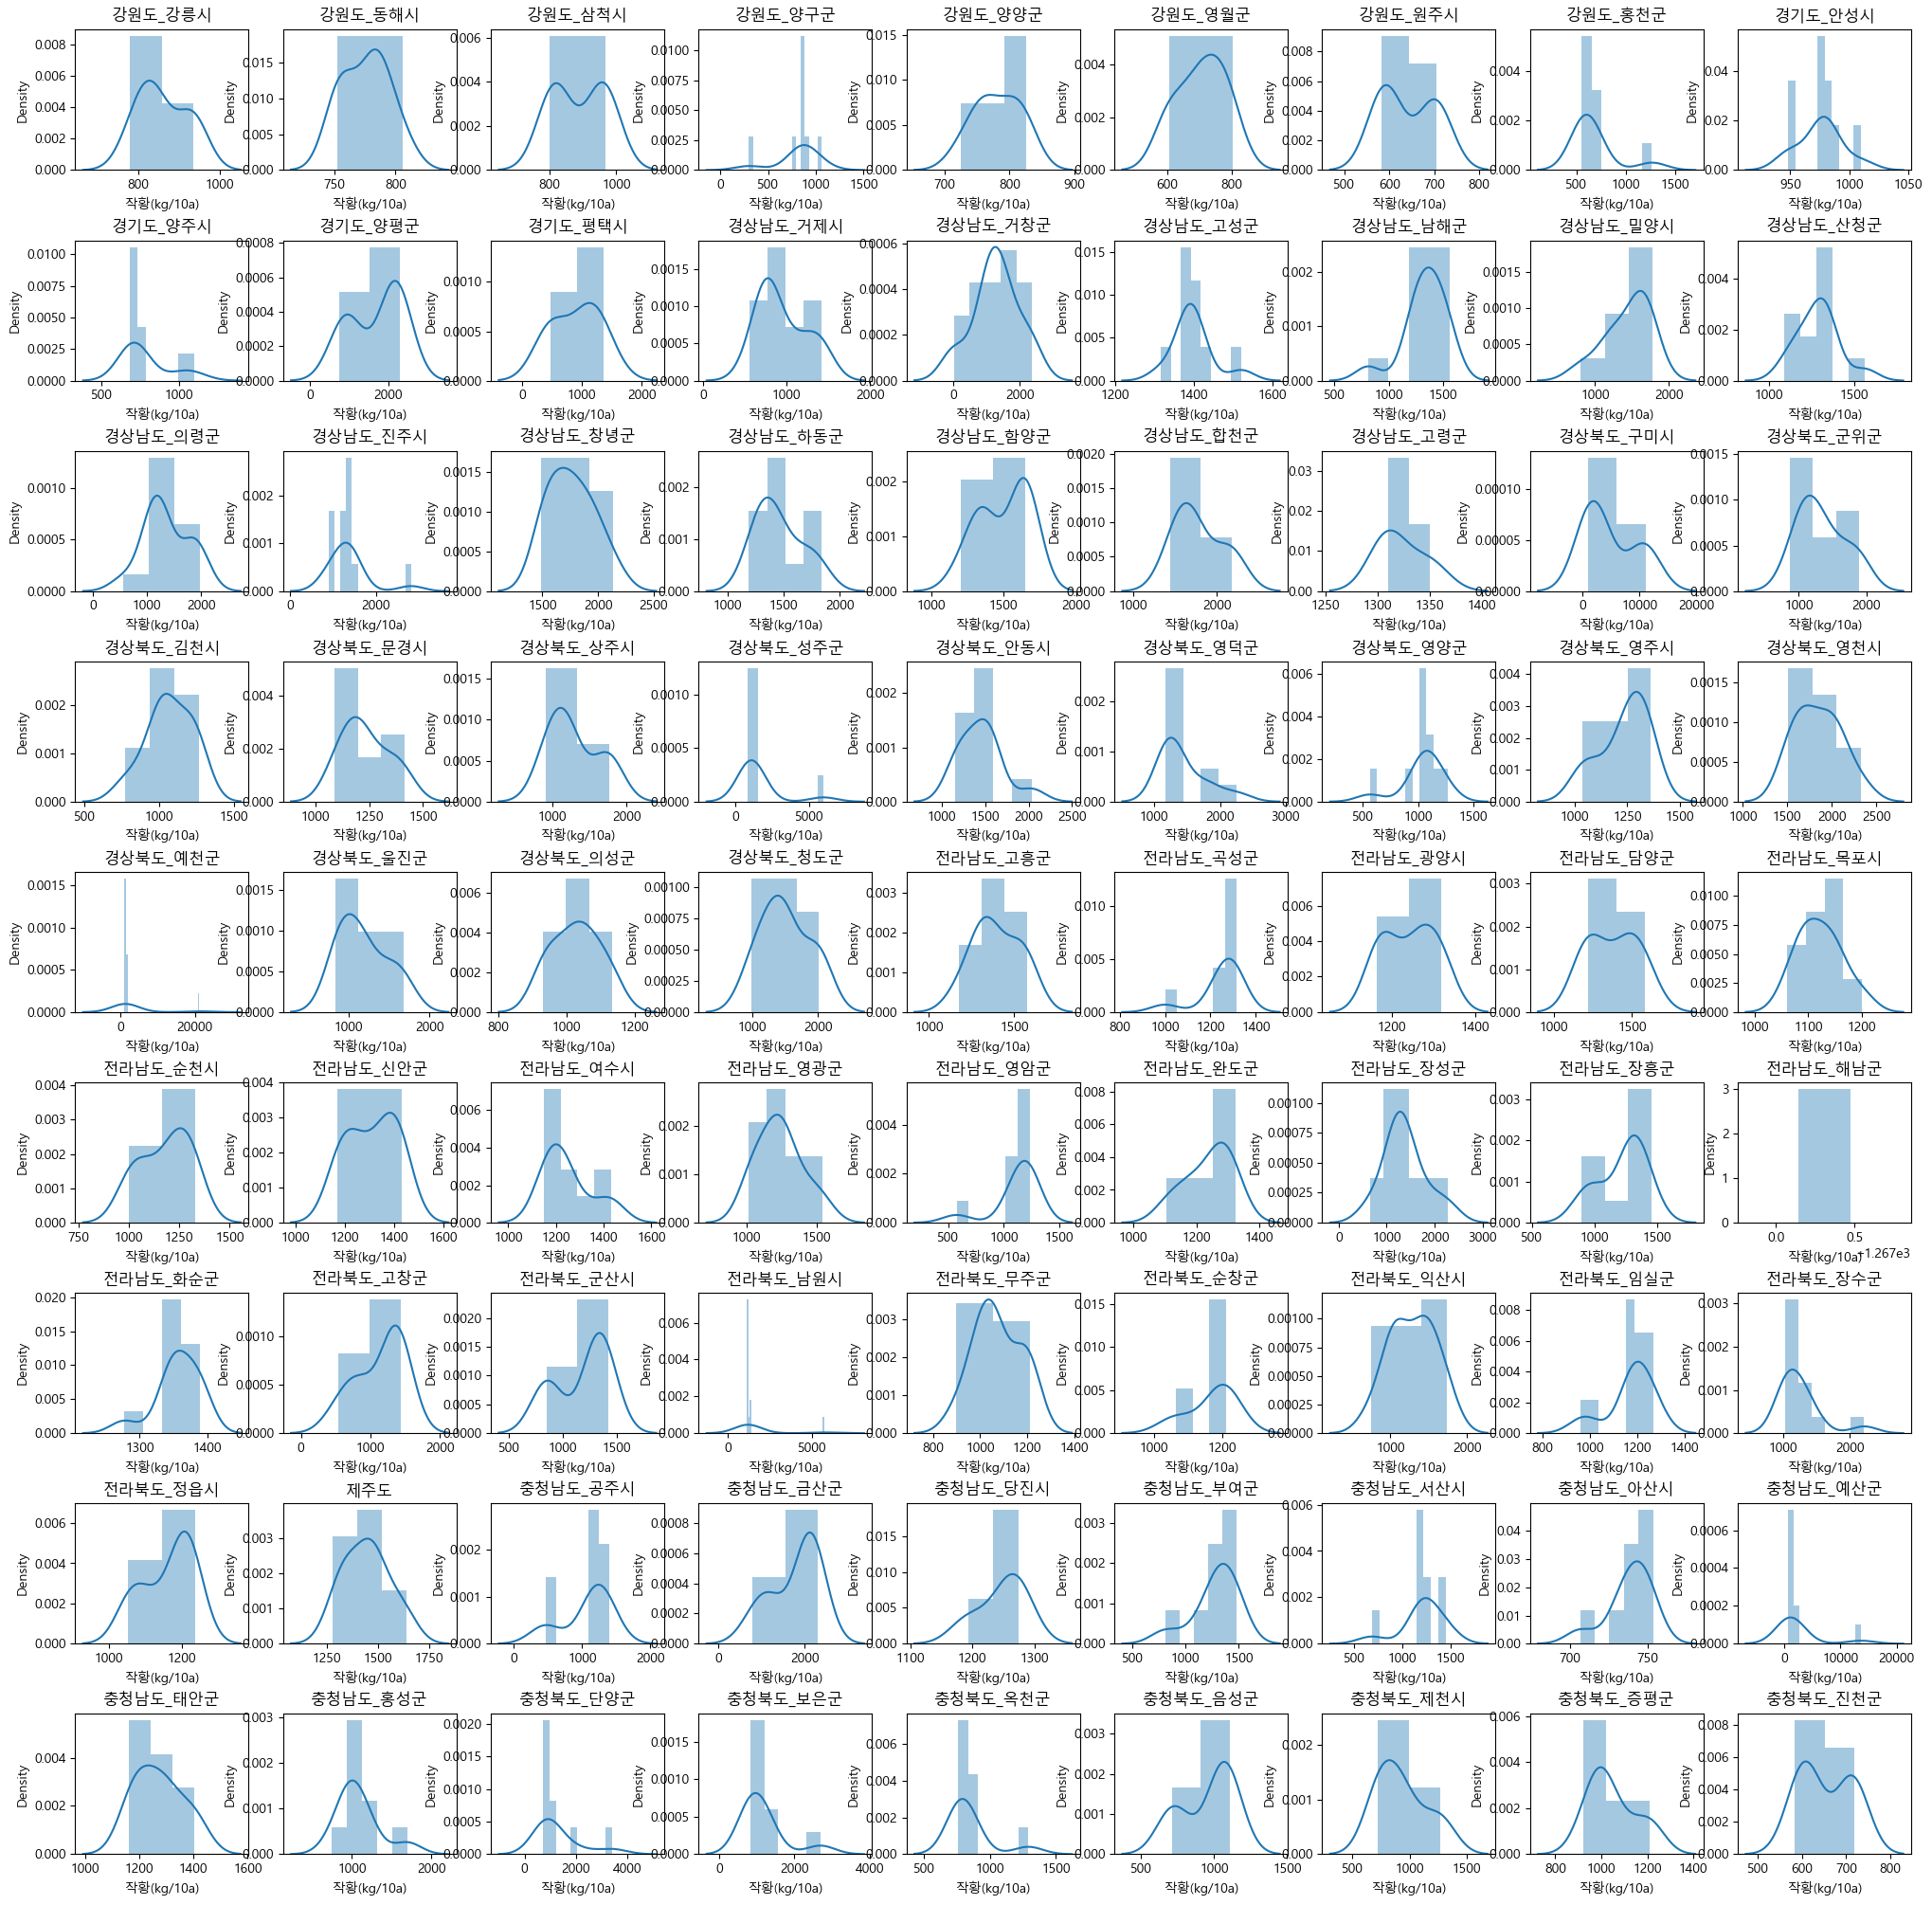

In [148]:
## 지역별 작황생산량을 세분화해서 살펴보겠습니다.
region_columns = df["시군"].unique().tolist()
fig, axs = plt.subplots(nrows = 9, ncols = 9, figsize = (25,25))
def hist_show(df, columns):
    
    for i,column in enumerate(region_columns):
        row = int(i/9)
        col = i%9
        print("지역명:", column, ",", "row 갯수:",len(df[df["시군"] == column]))
        sns.distplot(df[df["시군"] == column]["작황(kg/10a)"], ax = axs[row][col])
        axs[row][col].set_title(str(column))
        plt.subplots_adjust(hspace = 0.5)
        

        
hist_show(df, region_columns)
plt.show()

In [122]:
# 재배면적과, 생산량의 skew 정도를 살펴보겠습니다.
# 추후 log 변환된 feature 를 이용하겠습니다.
from scipy.stats import skew
skew_features = df[["재배면적(10a)","생산량(kg)"]].apply(lambda x : skew(x))
print("log 변환전 skew 정도", skew_features)

after_skew_log1p = np.log1p(df[["재배면적(10a)","생산량(kg)"]])
print("log 변환후 skew 정도 ",after_skew_log1p.apply(lambda x : skew(x)))

log 변환전 skew 정도 재배면적(10a)    3.121779
생산량(kg)      3.774654
dtype: float64
log 변환후 skew 정도  재배면적(10a)    1.149152
생산량(kg)      0.562942
dtype: float64


                  연도        코드  재배면적(10a)   생산량(kg)  작황(kg/10a)
연도          1.000000 -0.014817  -0.007099  0.011538    0.059023
코드         -0.014817  1.000000   0.450088  0.433921    0.011204
재배면적(10a)  -0.007099  0.450088   1.000000  0.973121    0.048204
생산량(kg)     0.011538  0.433921   0.973121  1.000000    0.107554
작황(kg/10a)  0.059023  0.011204   0.048204  0.107554    1.000000


<Axes: >

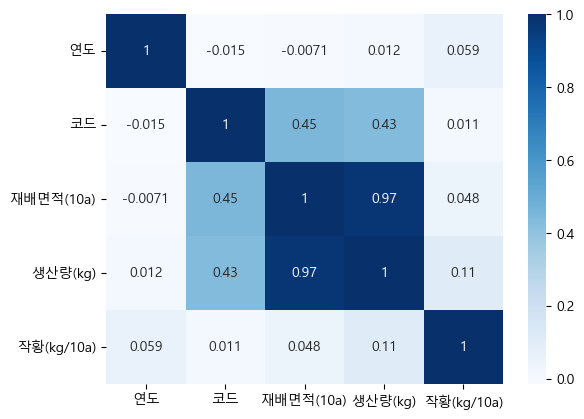

In [123]:
# 피처의 상관계수 확인
corr = df.drop("시군",axis = 1).corr()
print(corr)
sns.heatmap(corr, cmap = "Blues", annot = True)

In [124]:
#### 생산량과 재배면적이 상당히 큰 상관관계를 띄고 있습니다.

### baseline 으로 작황 예측량을 추정해보겠습니다.

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

feature = df.drop(["시군","작황(kg/10a)"], axis = 1)
label = df["작황(kg/10a)"]

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 156)

rf = RandomForestRegressor(n_estimators= 1000, random_state = 156)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)


print("R2_Score : ", r2_score(y_test,predict))
print("--------------------")
# print("before_target_log_fransform RMSE : {}".format(np.sqrt(mean_squared_error(y_test, predict))))

R2_Score :  0.7493178817555345
--------------------


<Figure size 1200x700 with 0 Axes>

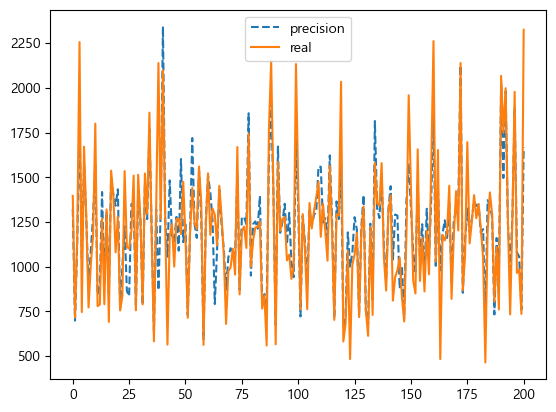

<Figure size 1200x700 with 0 Axes>

In [126]:
compare_df = pd.DataFrame()
compare_df["predict"] = predict
compare_df["real"] = y_test.values

compare_df["predict"].plot(linestyle='--', label='precision')
compare_df["real"].plot(label = "real")
plt.legend()
plt.figure(figsize = (12,7))

In [127]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test) 
    print('###',model.__class__.__name__,'###')
    print("R2_Score : {}".format(r2_score(y_test,pred)))
    print("RMSLE : {}".format(np.sqrt(mean_squared_error(y_test,pred))))
    print("RSME : {}".format(np.sqrt(mean_squared_error(y_test,pred))))
    print("MAE : {}".format(mean_absolute_error(y_test,pred)))
    print("#################")
    print("#################")
    

In [128]:
### 전처리 하기전 여러개의 model 로 성능평가

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=1000)
gbm_reg = GradientBoostingRegressor(n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]
for model in models:

    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values)

### RandomForestRegressor ###
R2_Score : 0.7499707724167596
RMSLE : 188.46234425838094
RSME : 188.46234425838094
MAE : 120.44806136605553
#################
#################
### GradientBoostingRegressor ###
R2_Score : 0.8539557772456735
RMSLE : 144.03611212110764
RSME : 144.03611212110764
MAE : 92.93118268495786
#################
#################
### XGBRegressor ###
R2_Score : 0.8551769844549804
RMSLE : 143.43264013533295
RSME : 143.43264013533295
MAE : 91.23665487617497
#################
#################
### LGBMRegressor ###
R2_Score : 0.5965637783490443
RMSLE : 239.39586418933436
RSME : 239.39586418933436
MAE : 144.74044055612978
#################
#################


RandomForestRegressor 의 가중치는 : [0.03199842 0.05104604 0.68514321 0.23181233] 입니다.
GradientBoostingRegressor 의 가중치는 : [0.01994901 0.05851892 0.72654898 0.19498309] 입니다.
XGBRegressor 의 가중치는 : [0.00941808 0.03090649 0.7574639  0.20221162] 입니다.
LGBMRegressor 의 가중치는 : [2655 4476 7985 7731] 입니다.


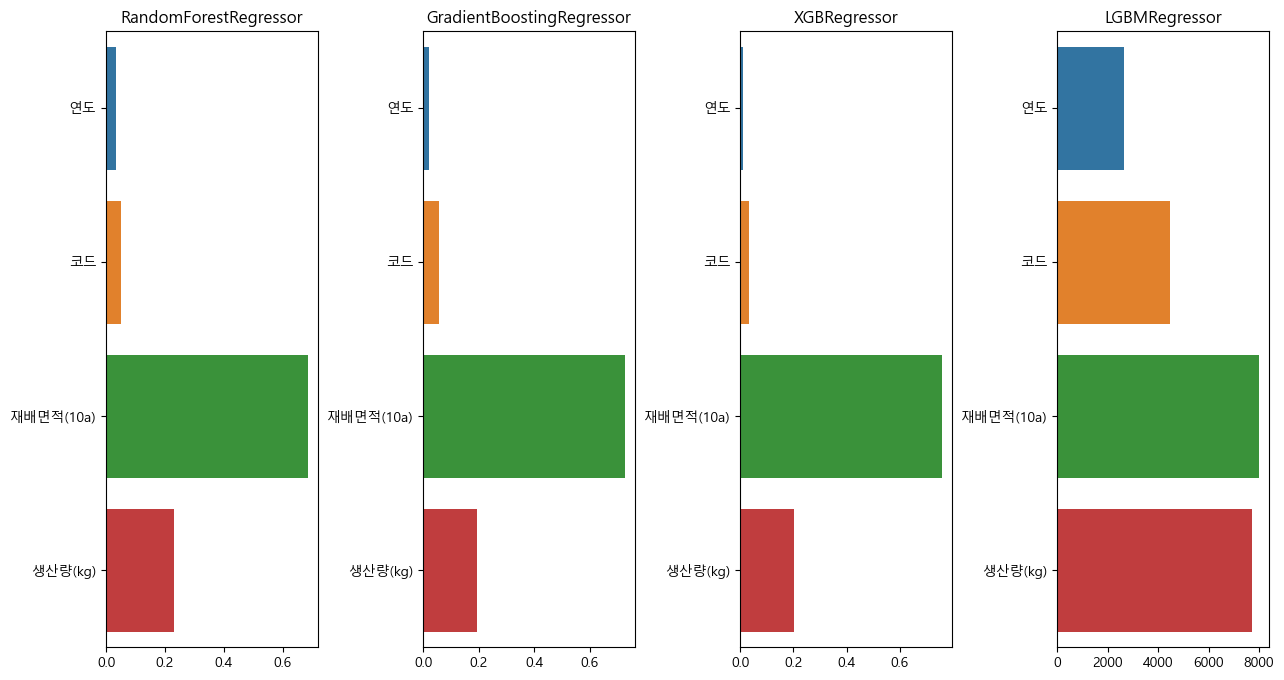

In [129]:
model_score = [rf_reg,gbm_reg,xgb_reg,lgbm_reg]

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15,8))

for i, score in enumerate(model_score):
    print("{} 의 가중치는 : {} 입니다.".format(score.__class__.__name__, score.feature_importances_))
    axs[i].set_title(score.__class__.__name__)
    sns.barplot(x = score.feature_importances_, y = df.drop(["작황(kg/10a)","시군"], axis = 1).columns, ax = axs[i])
    plt.subplots_adjust(wspace = 0.5)

### 전처리전 model 예측하는데 재배면적이 상당히 큰 영향을 끼친것을 볼수있습니다.

In [130]:
np.sort(rf_reg.feature_importances_)[::-1]

array([0.68514321, 0.23181233, 0.05104604, 0.03199842])

In [131]:
df.drop(["작황(kg/10a)","시군"], axis = 1).columns

Index(['연도', '코드', '재배면적(10a)', '생산량(kg)'], dtype='object')

In [132]:
#### ---------------------------------------- ################
#### ---------------------------------------- ################

#### 전체적인 feature 엔지니어링 이후 다시 모델예측을 해보겠습니다.

In [133]:
## 1. 작황 log1p 적용
## 2. feature 에 대한 log 1p 적용

In [134]:
processing_df = df.copy()
processing_df

,연도,시군,코드,재배면적(10a),생산량(kg),작황(kg/10a)
0,2013.0,강원도_강릉시,51150.0,2.40,187000.0,779.2
1,2014.0,강원도_강릉시,51150.0,2.37,221700.0,935.4
2,2015.0,강원도_강릉시,51150.0,2.37,191300.0,807.0
3,2016.0,강원도_강릉시,51150.0,2.31,214300.0,927.6
4,2017.0,강원도_강릉시,51150.0,2.12,181100.0,854.3
...,...,...,...,...,...,...
799,2017.0,충청북도_진천군,43750.0,4.20,253000.0,602.0
800,2018.0,충청북도_진천군,43750.0,4.40,257000.0,584.0
801,2019.0,충청북도_진천군,43750.0,3.80,233000.0,613.0
802,2020.0,충청북도_진천군,43750.0,2.90,179000.0,617.2


In [135]:
# 작황 log1p 적용
processing_df["log1p_target"] = np.log1p(processing_df["작황(kg/10a)"])

In [136]:
# # feature 에 대한 log1p 적용
after_skew_log1p = np.log1p(processing_df[["재배면적(10a)","생산량(kg)"]])
processing_df[["after_log1p_10area","after_log1p_kg"]] = after_skew_log1p

In [137]:
# 기존의 재배면적, 생산량, 작황 column drop 하겠습니다.

processing_df.drop(["재배면적(10a)","생산량(kg)","작황(kg/10a)"], axis = 1, inplace = True)

In [138]:
processing_df

,연도,시군,코드,log1p_target,after_log1p_10area,after_log1p_kg
0,2013.0,강원도_강릉시,51150.0,6.659550,1.223775,12.138869
1,2014.0,강원도_강릉시,51150.0,6.842043,1.214913,12.309085
2,2015.0,강원도_강릉시,51150.0,6.694562,1.214913,12.161603
3,2016.0,강원도_강릉시,51150.0,6.833678,1.196948,12.275137
4,2017.0,강원도_강릉시,51150.0,6.751452,1.137833,12.106810
...,...,...,...,...,...,...
799,2017.0,충청북도_진천군,43750.0,6.401917,1.648659,12.441149
800,2018.0,충청북도_진천군,43750.0,6.371612,1.686399,12.456835
801,2019.0,충청북도_진천군,43750.0,6.419995,1.568616,12.358798
802,2020.0,충청북도_진천군,43750.0,6.426812,1.360977,12.095147


<Axes: >

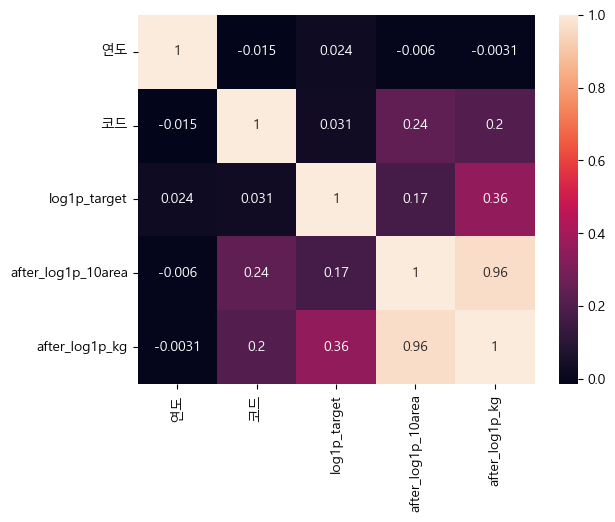

In [139]:
processing_df_corr = processing_df.drop("시군",axis = 1).corr()
sns.heatmap(processing_df_corr, annot = True)

### 전처리된 데이터로 다시 모델링해보겠습니다.

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


processing_feature = processing_df.drop(["시군","log1p_target"], axis = 1)
processing_label = processing_df["log1p_target"]

X_train, X_test, y_train, y_test = train_test_split(processing_feature, processing_label, random_state = 156)

rf = RandomForestRegressor(n_estimators= 1000, random_state = 156)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)


print("R2_Score : ", r2_score(y_test,predict))
print("--------------------")
# print("before_target_log_fransform RMSE : {}".format(np.sqrt(mean_squared_error(y_test, predict))))

R2_Score :  0.7557169511754775
--------------------


<Axes: >

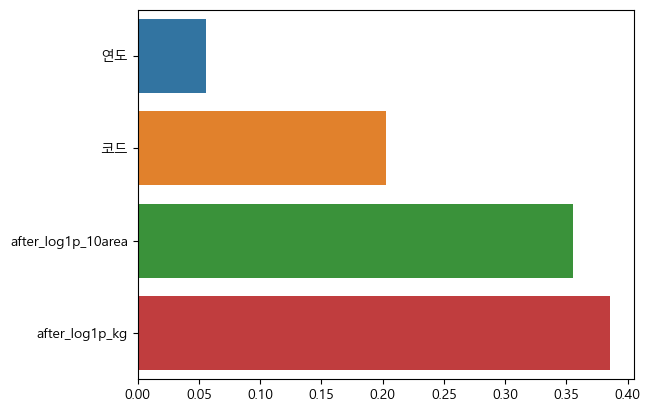

In [141]:
sns.barplot(x= rf.feature_importances_ , y= processing_df.drop(["시군","log1p_target"], axis = 1).columns) 

<Figure size 1200x700 with 0 Axes>

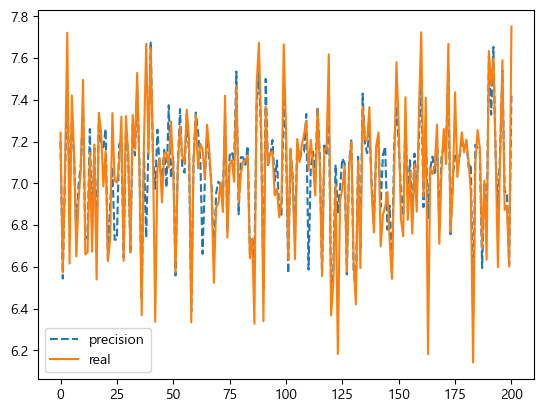

<Figure size 1200x700 with 0 Axes>

In [142]:
compare_df = pd.DataFrame()
compare_df["predict"] = predict
compare_df["real"] = y_test.values

compare_df["predict"].plot(linestyle='--', label='precision')
compare_df["real"].plot(label = "real")
plt.legend()
plt.figure(figsize = (12,7))

In [143]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    real_is_expm1 = np.expm1(y_test)
    pred_is_expm1 = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    print("R2_Score : {}".format(r2_score(y_test,pred)))
    print("RMSLE : {}".format(np.sqrt(mean_squared_error(y_test,pred))))
    print("RSME : {}".format(np.sqrt(mean_squared_error(real_is_expm1, pred_is_expm1))))
    print("MAE : {}".format(mean_absolute_error(real_is_expm1,pred_is_expm1)))
    print("#################")


In [144]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=1000)
gbm_reg = GradientBoostingRegressor(n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]
for model in models:

    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values)

### RandomForestRegressor ###
R2_Score : 0.7513258164467066
RMSLE : 0.16080939973583414
RSME : 188.12540970754247
MAE : 116.43694852301903
#################
### GradientBoostingRegressor ###
R2_Score : 0.8672977933387184
RMSLE : 0.11747221367487806
RSME : 137.66624619147584
MAE : 90.49060853564858
#################
### XGBRegressor ###
R2_Score : 0.8200936687541938
RMSLE : 0.13677896215159552
RSME : 152.83176297712993
MAE : 94.26639832453942
#################
### LGBMRegressor ###
R2_Score : 0.8272852923749123
RMSLE : 0.1340172621103504
RSME : 171.2794993558104
MAE : 101.3639908033612
#################


### 전처리전 LGBMRegressor 에 대한 evaluation 값이 다른모델에 비해 많이 낮았는데 전처리후 많이 개선되었습니다.

RandomForestRegressor 의 가중치는 : [0.05601201 0.20282393 0.35366722 0.38749685] 입니다.
GradientBoostingRegressor 의 가중치는 : [0.01136184 0.16144943 0.43206671 0.39512203] 입니다.
XGBRegressor 의 가중치는 : [0.1823385  0.18600747 0.35668024 0.27497378] 입니다.
LGBMRegressor 의 가중치는 : [2842 4963 7832 7354] 입니다.


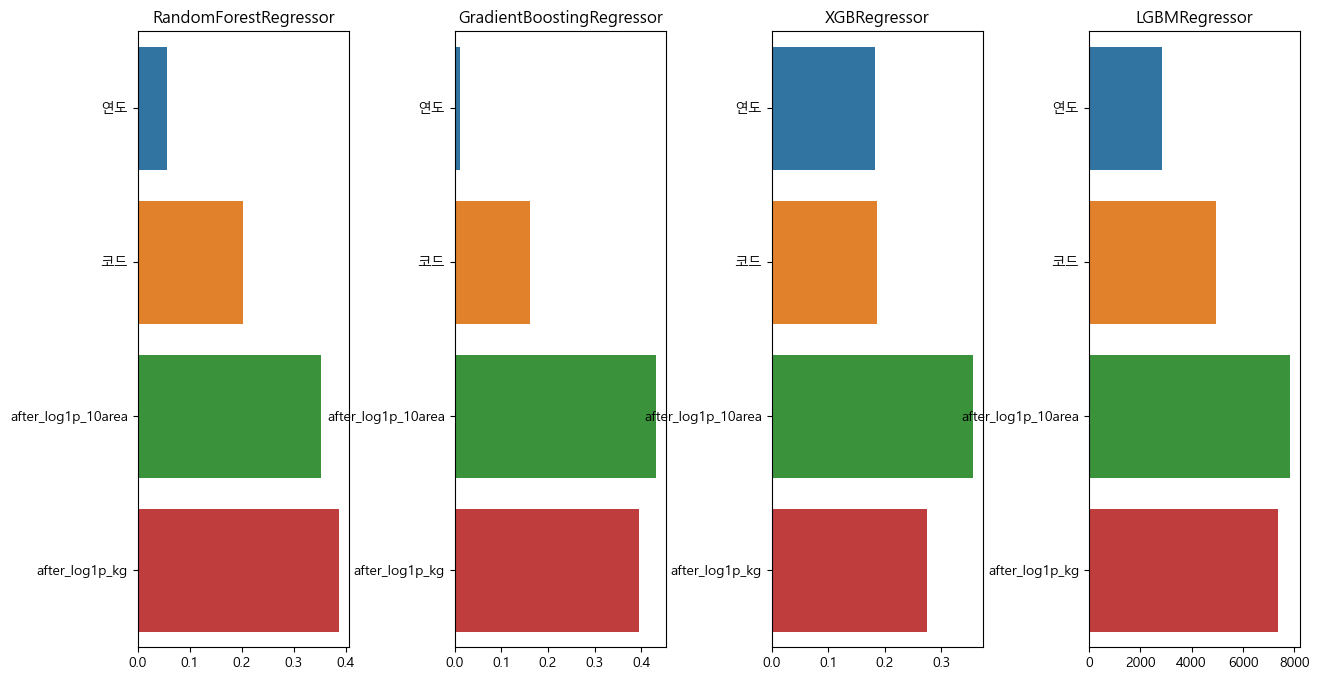

In [145]:
model_score = [rf_reg,gbm_reg,xgb_reg,lgbm_reg]

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15,8))

for i, score in enumerate(model_score):
    print("{} 의 가중치는 : {} 입니다.".format(score.__class__.__name__, score.feature_importances_))
    axs[i].set_title(score.__class__.__name__)
    sns.barplot(x = score.feature_importances_, y= processing_df.drop(["시군","log1p_target"], axis = 1).columns, ax = axs[i])
    plt.subplots_adjust(wspace = 0.5)

#### 전처리전에는 재배면적에 많은 가중치를 두어 작황량을 예측하여 다른 모델에 비해 LGBMRegressor 이 많이 값이 튀었는데 전처리 후 재배면적은 물론 생산량에 대한 가중치를 더 높여 모델예측 안정성을 확보할수 있었습니다.